# Brain Tumor detector

# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'Brain MRI Images for Brain Tumour Detection.ipynb',
 'Brain_Tumor_complete.ipynb',
 'data',
 'logs',
 'models']

In [3]:
os.listdir('data/')

['no', 'yes']

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_extensions = ['jpg','jpeg','png','bmp']

In [8]:
os.listdir(os.path.join(data_dir,'yes'))

['Y1.jpg',
 'Y10.jpg',
 'Y100.JPG',
 'Y101.jpg',
 'Y102.jpg',
 'Y103.jpg',
 'Y104.jpg',
 'Y105.jpg',
 'Y106.jpg',
 'Y107.jpg',
 'Y108.jpg',
 'Y109.JPG',
 'Y11.jpg',
 'Y111.JPG',
 'Y112.JPG',
 'Y113.JPG',
 'Y114.JPG',
 'Y115.JPG',
 'Y116.JPG',
 'Y117.JPG',
 'Y12.jpg',
 'Y120.JPG',
 'Y13.jpg',
 'Y14.jpg',
 'Y146.JPG',
 'Y147.JPG',
 'Y148.JPG',
 'Y15.jpg',
 'Y153.jpg',
 'Y154.jpg',
 'Y155.JPG',
 'Y156.JPG',
 'Y157.JPG',
 'Y158.JPG',
 'Y159.JPG',
 'Y16.JPG',
 'Y160.JPG',
 'Y161.JPG',
 'Y162.jpg',
 'Y163.JPG',
 'Y164.JPG',
 'Y165.JPG',
 'Y166.JPG',
 'Y167.JPG',
 'Y168.jpg',
 'Y169.jpg',
 'Y17.jpg',
 'Y170.JPG',
 'Y18.JPG',
 'Y180.jpg',
 'Y181.jpg',
 'Y182.JPG',
 'Y183.jpg',
 'Y184.JPG',
 'Y185.jpg',
 'Y186.jpg',
 'Y187.jpg',
 'Y188.jpg',
 'Y19.JPG',
 'Y192.JPG',
 'Y193.JPG',
 'Y194.jpg',
 'Y195.JPG',
 'Y2.jpg',
 'Y20.jpg',
 'Y21.jpg',
 'Y22.jpg',
 'Y23.JPG',
 'Y24.jpg',
 'Y242.JPG',
 'Y243.JPG',
 'Y244.JPG',
 'Y245.jpg',
 'Y246.JPG',
 'Y247.JPG',
 'Y248.JPG',
 'Y249.JPG',
 'Y25.jpg',
 'Y250

In [9]:
img = cv2.imread(os.path.join('data','yes','Y1.jpg'))
img

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]], dtype=uint8)

In [10]:
img.shape

(218, 180, 3)

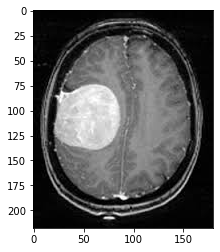

In [11]:
plt.imshow(img)
plt.show()

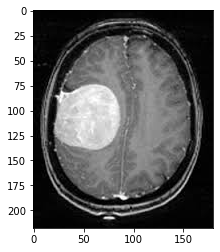

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir('data/'):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

# 3. Load Data

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 250 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
batch

(array([[[[6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          ...,
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ]],
 
         [[6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          ...,
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ]],
 
         [[6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          ...,
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ]],
 
         ...,
 
         [[6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          ...,
          [5.  , 5.  , 5.  ],
          [5.  , 5.  , 5.  ],
          [5.  , 5.  , 5.  ]],
 
         [[6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          [6.  , 6.  , 6.  ],
          ...,
          [5.  , 5.  , 5.  ],
          [5.  , 5.  , 5.  ],
          [5.  , 5.  , 5.  

In [18]:
len(batch)

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
# class 1 = yes
# class 0 = no

batch[1]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [21]:
data.class_names

['no', 'yes']

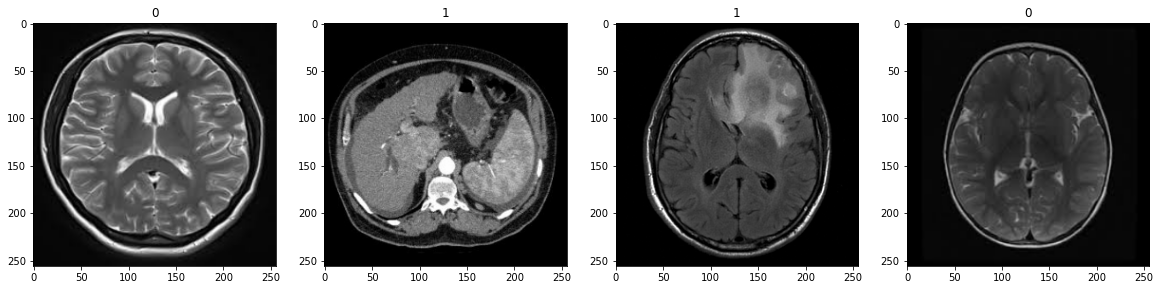

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [23]:
batch[0].min()

0.0

In [24]:
batch[0].max()

255.0

In [25]:
scaled = batch[0]/255

In [26]:
scaled.max()

1.0

In [27]:
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [28]:
data.as_numpy_iterator().next()

(array([[[[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [1.9914217e-03, 1.9914217e-03, 1.9914217e-03],
          ...,
          [4.5128677e-02, 4.5128677e-02, 3.7285540e-02],
          [4.9448531e-02, 4.9448531e-02, 4.1605391e-02],
          [5.4901961e-02, 5.4901961e-02, 4.7058824e-02]],
 
         [[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [1.9914217e-03, 1.9914217e-03, 1.9914217e-03],
          ...,
          [4.5128677e-02, 4.5128677e-02, 3.7285540e-02],
          [4.8288681e-02, 4.8288681e-02, 4.0445544e-02],
          [5.1095281e-02, 5.1095281e-02, 4.3252144e-02]],
 
         [[1.9148285e-04, 1.9148285e-04, 1.9148285e-04],
          [1.9148285e-04, 1.9148285e-04, 1.9148285e-04],
          [9.7237382e-05, 9.7237382e-05, 9.7237382e-05],
          ...,
          [4.5128677e-02, 4.5128677e-02, 3.7285540e-02],
          [4.7117166e-02, 4.7117166e-

In [29]:
data.as_numpy_iterator().next()[0].min()

0.0

In [30]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [31]:
len(data)

8

In [32]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [33]:
train_size, val_size, test_size

(5, 2, 1)

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 10s 1s/step - loss: 0.6383 - accuracy: 0.7437 - val_loss: 0.3843 - val_accuracy: 0.8438
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 0.4945 - accuracy: 0.7563 - val_loss: 0.4969 - val_accuracy: 0.8438
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 0.4819 - accuracy: 0.8375 - val_loss: 0.3780 - val_accuracy: 0.8906
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 0.3703 - accuracy: 0.8375 - val_loss: 0.4536 - val_accuracy: 0.7969
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.3328 - accuracy: 0.8687 - val_loss: 0.2067 - val_accuracy: 0.9375
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.2074 - accuracy: 0.9250 - val_loss: 0.2216 - val_accuracy: 0.9219
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.1874 - accuracy: 0.9500 - val_loss: 0.1626 - val_accuracy: 0.9531
Epoch 8/20
5/5 [========================

In [43]:
hist

In [44]:
hist.history

{'loss': [0.6383333802223206,
  0.4944912791252136,
  0.4818526804447174,
  0.37032192945480347,
  0.3328092098236084,
  0.20740222930908203,
  0.18739092350006104,
  0.14306524395942688,
  0.11284951120615005,
  0.10269741714000702,
  0.06299160420894623,
  0.041975513100624084,
  0.026331162080168724,
  0.011131398379802704,
  0.004947106819599867,
  0.008899137377738953,
  0.01140652596950531,
  0.006093775853514671,
  0.0027804349083453417,
  0.0029863540548831224],
 'accuracy': [0.7437499761581421,
  0.7562500238418579,
  0.8374999761581421,
  0.8374999761581421,
  0.8687499761581421,
  0.925000011920929,
  0.949999988079071,
  0.96875,
  0.949999988079071,
  0.96875,
  0.9750000238418579,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9937499761581421,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.3843440115451813,
  0.4969336986541748,
  0.37798455357551575,
  0.453615665435791,
  0.2067343294620514,
  0.2216482013463974,
  0.16262194514274597,
  0.1883702129125595,
  0.11111339181661606,
  0.0

# 8. Plot Performance

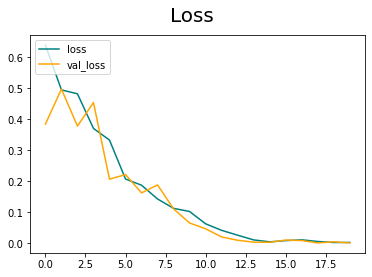

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

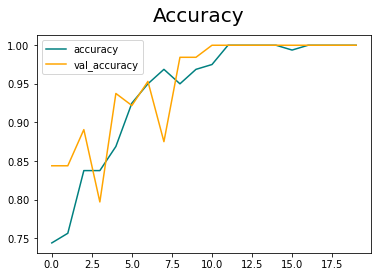

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
len(test)

1

In [50]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 541ms/step


In [51]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [52]:
yhat=[]
y_true = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true = y_true + y.tolist()
    yhat = yhat+[1 if element>0.5 else 0 for element in model.predict(X)]

1/1 [==============================] - 0s 291ms/step


In [53]:
y_pred = np.array(yhat)
y_test = np.array(y_true)

In [54]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1])

In [55]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1])

In [56]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



#### See we are gettting 100% accuracy on test data that is great

# 10. Test

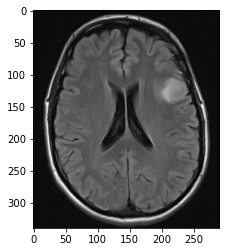

In [57]:
img = cv2.imread(os.path.join('data','yes','Y45.JPG'))
plt.imshow(img)
plt.show()

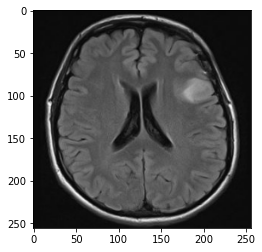

In [58]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 63ms/step


In [60]:
yhat

array([[0.99610424]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Has Brain Tumor')
else:
    print(f'Dont have brain tumor')

Has Brain Tumor


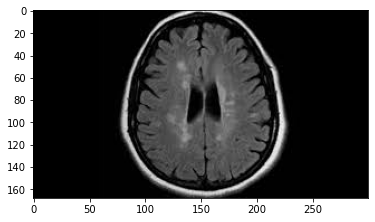

In [62]:
img = cv2.imread(os.path.join('data','no','13 no.jpg'))
plt.imshow(img)
plt.show()

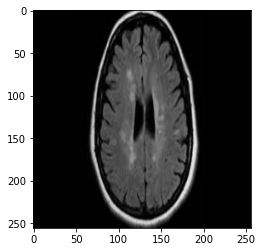

In [63]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 78ms/step


In [65]:
yhat

array([[5.018903e-07]], dtype=float32)

In [66]:
if yhat > 0.5: 
    print(f'Has Brain Tumor')
else:
    print(f'Dont have brain tumor')

Dont have brain tumor


# 11. Save the Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','BrainTumor.h5'))

In [69]:
new_model = load_model(os.path.join('models','BrainTumor.h5'))

In [70]:
new_model

In [71]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [72]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 190ms/step


In [73]:
if yhat > 0.5: 
    print(f'Has Brain Tumor')
else:
    print(f'Dont have brain tumor')

Dont have brain tumor
